In [150]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [151]:
def plot(time, amplitudes, title, xlabel, ylabel):
    fig = plt.figure(figsize=(8,5))
    ax = plt.axes()
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    ax.plot(time, amplitudes)
    plt.show()

### 1. Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić częstotliwościową charakterystykę amplitudową sygnału.

<IPython.core.display.Javascript object>


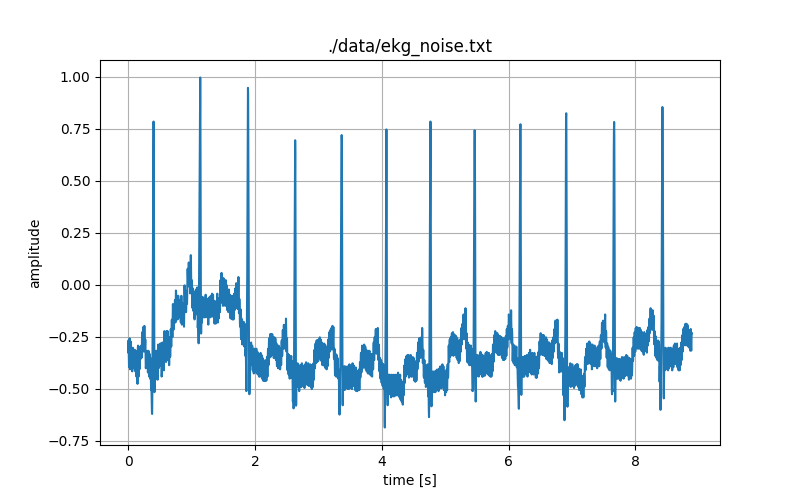

In [152]:
file = './data/ekg_noise.txt'
data = np.loadtxt(file)
time = data[:,0]
amplitudes = data[:,1]

plot(time, amplitudes, file, 'time [s]', 'amplitude')

<IPython.core.display.Javascript object>


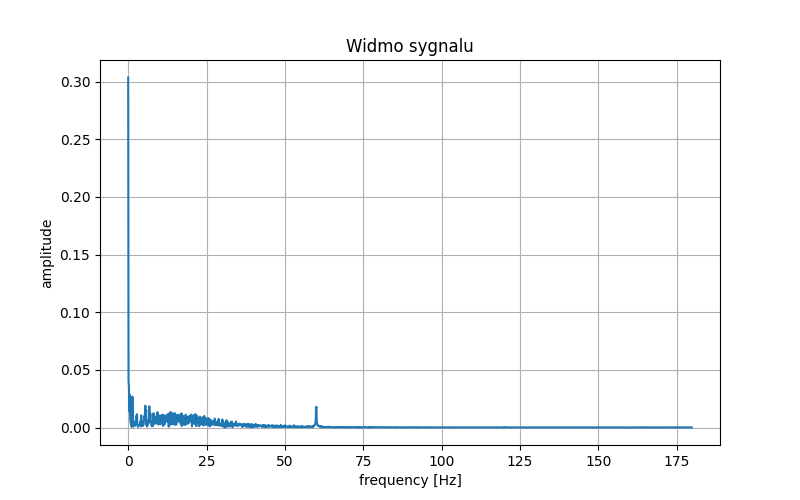

In [153]:
fs = 360
length = len(amplitudes)

fft = np.fft.fft(amplitudes) / length
fft_abs = np.abs(fft)
frequencies = fs * np.arange(length) / length

half = int(length/2)

plot(frequencies[0:half], fft_abs[0:half], f'Widmo sygnalu', 'frequency [Hz]', 'amplitude')

### 2. Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji zakłóceń pochodzących z sieci zasilającej. Wyznacz parametry filtra, wykreśl jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału po filtracji oraz jego widmo. Można też wyznaczyć różnicę między sygnałem przed i po filtracji i widmo tej różnicy.

<IPython.core.display.Javascript object>


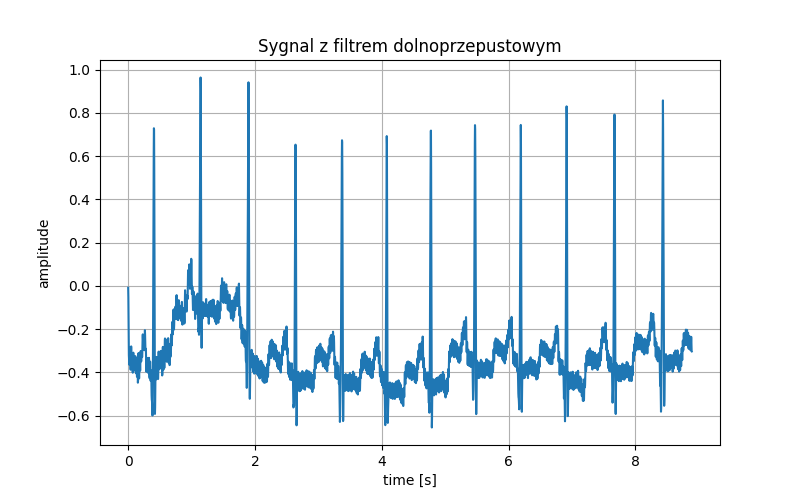

In [154]:
ft = 60
order = 4

sos = signal.butter(order, ft, 'low', fs=fs, output='sos')
filtered = signal.sosfilt(sos, amplitudes)

plot(time, filtered, 'Sygnal z filtrem dolnoprzepustowym', 'time [s]', 'amplitude')

<IPython.core.display.Javascript object>


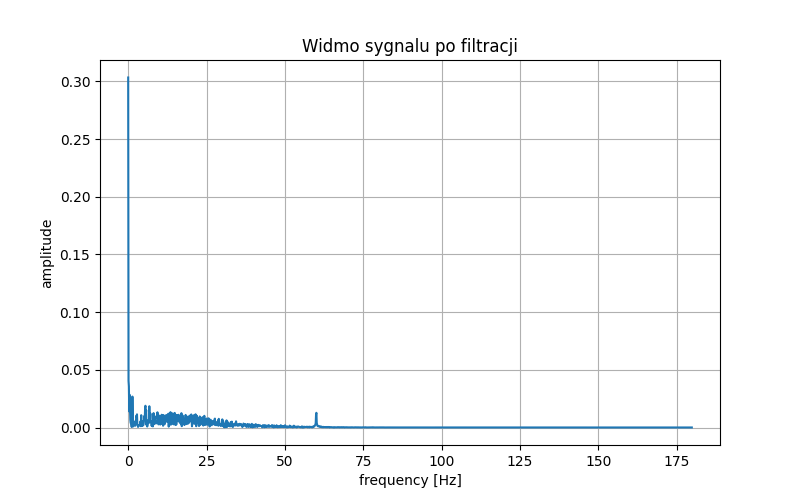

In [155]:
length = len(filtered)

fft = np.fft.fft(filtered) / length
fft_abs = np.abs(fft)
frequencies = fs * np.arange(length) / length

half = int(length/2)

plot(frequencies[0:half], fft_abs[0:half], f'Widmo sygnalu po filtracji', 'frequency [Hz]', 'amplitude')

<IPython.core.display.Javascript object>


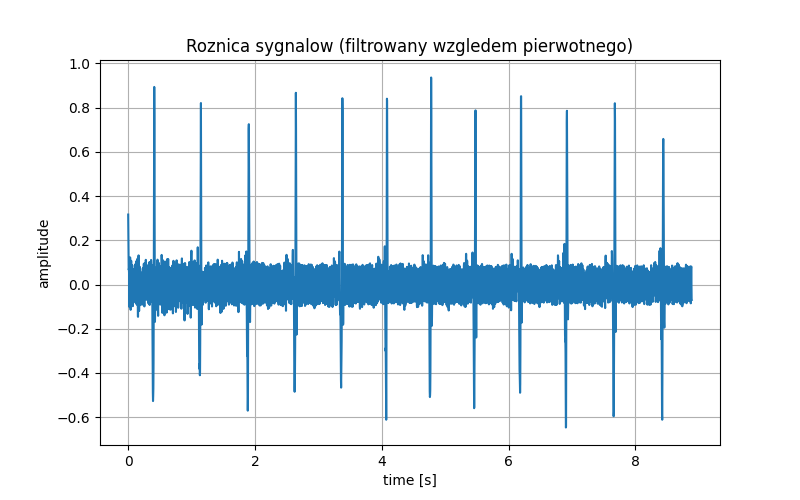

In [156]:
diff = filtered - amplitudes

plot(time, diff, f'Roznica sygnalow (filtrowany wzgledem pierwotnego)', 'time [s]', 'amplitude')

<IPython.core.display.Javascript object>


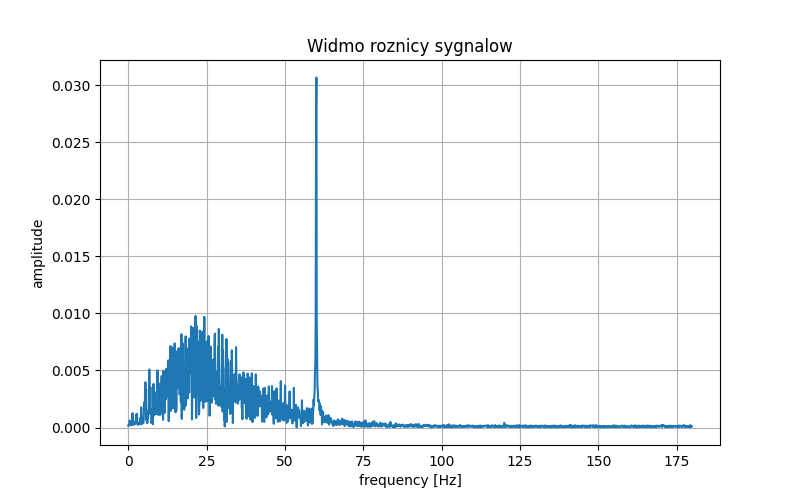

In [157]:
length = len(diff)

fft = np.fft.fft(diff) / length
fft_abs = np.abs(fft)
frequencies = fs * np.arange(length) / length

half = int(length/2)

plot(frequencies[0:half], fft_abs[0:half], f'Widmo roznicy sygnalow', 'frequency [Hz]', 'amplitude')

### 3. Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy o częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej. Sporządź wykresy sygnałów jak w punkcie 2.

<IPython.core.display.Javascript object>


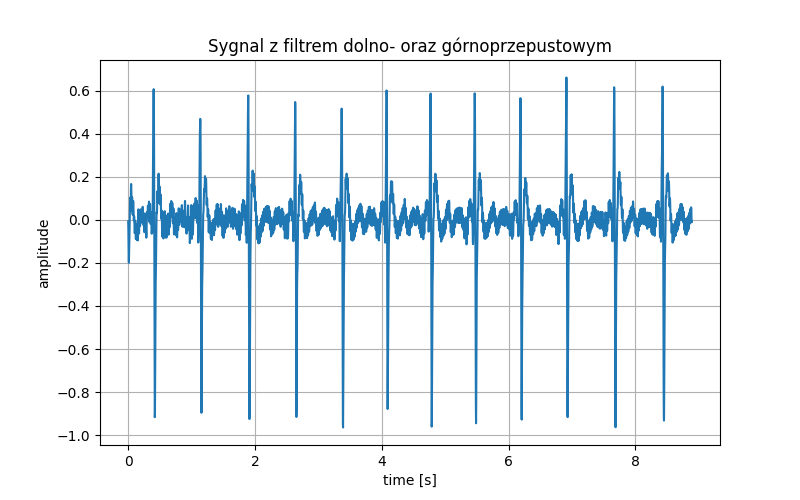

In [158]:
ft = 5
order = 4

sos = signal.butter(order, ft, 'high', fs=fs, output='sos')
filtered2 = signal.sosfilt(sos, filtered)

plot(time, filtered2, 'Sygnal z filtrem dolno- oraz górnoprzepustowym', 'time [s]', 'amplitude')

<IPython.core.display.Javascript object>


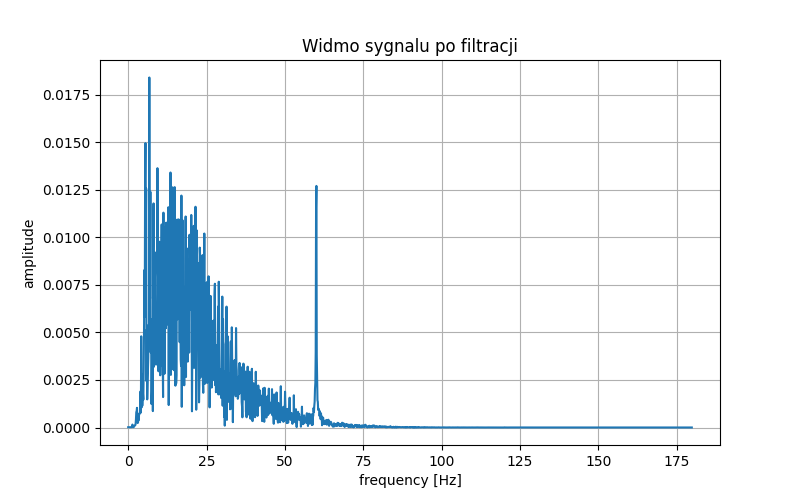

In [159]:
length = len(filtered2)

fft = np.fft.fft(filtered2) / length
fft_abs = np.abs(fft)
frequencies = fs * np.arange(length) / length

half = int(length/2)

plot(frequencies[0:half], fft_abs[0:half], f'Widmo sygnalu po filtracji', 'frequency [Hz]', 'amplitude')

<IPython.core.display.Javascript object>


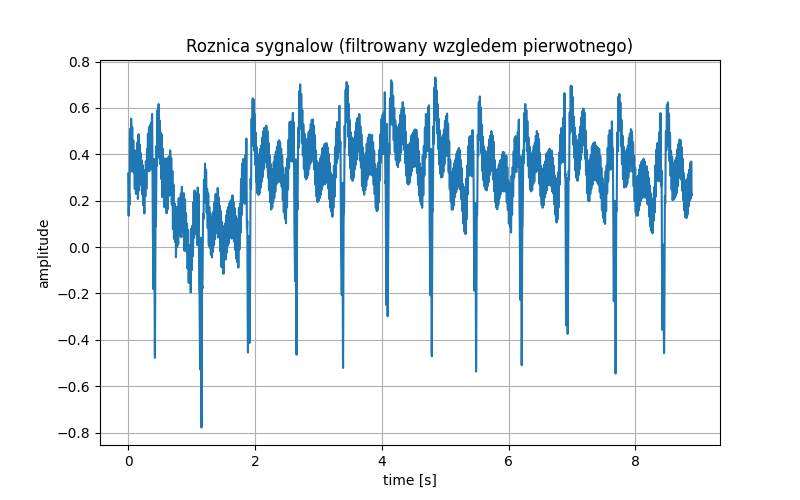

In [160]:
diff = filtered2 - amplitudes

plot(time, diff, f'Roznica sygnalow (filtrowany wzgledem pierwotnego)', 'time [s]', 'amplitude')